# Clasificarea emoticoanelor in functie de emotia sugerata (happy vs sad)

### Pasul 1 - incarcarea datelor si afisarea distributiei lor

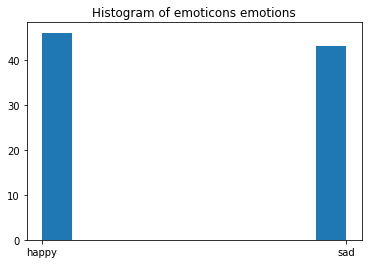

In [8]:
from utils import *

inputs, outputs = load_emoticons()

plot_data_histograms(outputs, 'emoticons emotions')

### Pasul 2 - Impartirea datelor in date de antrenament si date de validare si normalizarea datelor

In [13]:
# impratirea datelor in date de antrenament si date de validare
train_inputs, train_outputs, validation_inputs, validation_outputs = split_data_into_training_and_validation(inputs, outputs, 0.7)

# normalizarea datelor
train_inputs_flattened = [flatten_matrix(train_input) for train_input in train_inputs]
print(type(train_inputs_flattened))
validation_inputs_flattened = [flatten_matrix(validation_input) for validation_input in validation_inputs]
train_inputs_flattened, validation_inputs_flattened = normalisation(train_inputs_flattened, validation_inputs_flattened)

<class 'list'>


### Pasul 3 - Invatare model

In [10]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=10000)
classifier = classifier.fit(train_inputs_flattened, train_outputs)

### Pasul 4 - Testarea datelor de validare

In [11]:
predicted_validation_outputs = classifier.predict(validation_inputs_flattened)

### Pasul 5 - Calculul acuratetii si afisarea matricei de confuzie

Accuracy: 0.7037037037037037


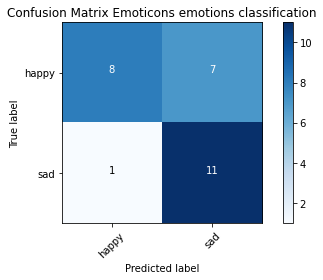

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix

# calculul acuratetii
accuracy = accuracy_score(validation_outputs, predicted_validation_outputs)
print('Accuracy:', accuracy)

# afisarea matricei de confuzie
cm = confusion_matrix(validation_outputs, predicted_validation_outputs)
label_names = list(set(outputs))
plot_confusion_matrix(cm, label_names, 'Emoticons emotions classification')